In [2]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import decode_predictions
from efficientnet import EfficientNetB0, EfficientNetB3
from efficientnet import center_crop_and_resize, preprocess_input

import os

Using TensorFlow backend.


# Download EfficientNet

In [4]:
model = EfficientNetB0(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
21856256/21849008 [==============================] - 21s 1us/step


# Load Image

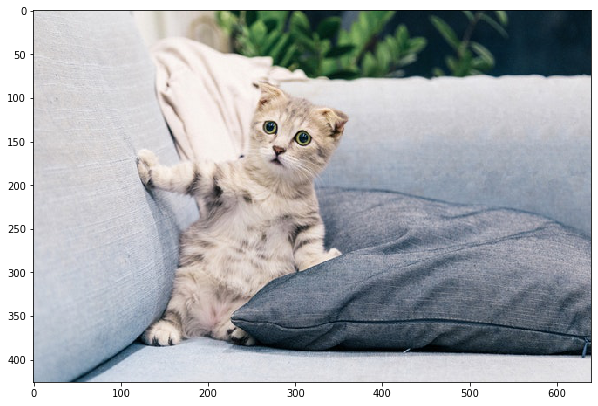

In [5]:
image = imread('imgs/cat.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# Center Crop and Resize

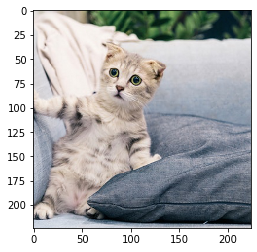

In [6]:
image_size = model.input_shape[1] # 224

x = center_crop_and_resize(image, image_size=image_size)

plt.imshow(x.astype(np.uint8))

# Preprocess Input

In [7]:
x = preprocess_input(x)
x = np.expand_dims(x, 0)

y = model.predict(x)

dy = decode_predictions(y)

print(dy)

40960/35363 [==================================] - 0s 1us/step
[[('n02124075', 'Egyptian_cat', 0.5907443), ('n02123045', 'tabby', 0.06517498), ('n02127052', 'lynx', 0.05975149), ('n02123159', 'tiger_cat', 0.02358173), ('n02123394', 'Persian_cat', 0.012102671)]]


# Define Inference Function

In [9]:
def inference(model, image_path):
    image = imread(image_path)
    
    image_size = model.input_shape[1] # 224
    cx = center_crop_and_resize(image, image_size=image_size)
    
    x = preprocess_input(cx)
    x = np.expand_dims(x, 0)

    y = model.predict(x)
    dy = decode_predictions(y)[0]
    
    for idx, label, confidence in dy:
        print('%s: %.2f%%' % (label, confidence * 100))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cx.astype(np.uint8))
    plt.show()

# Test

organ: 45.73%
palace: 17.93%
bell_cote: 10.92%
castle: 5.28%
flagpole: 0.98%


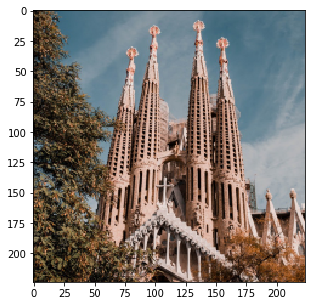

In [10]:
inference(model, 'imgs/01.jpg')

gazelle: 42.93%
ox: 6.38%
ibex: 4.37%
impala: 4.24%
hare: 3.27%


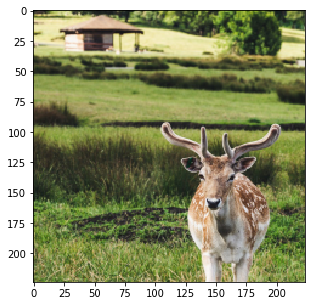

In [11]:
inference(model, 'imgs/02.jpg')

carbonara: 64.01%
plate: 4.58%
broccoli: 1.39%
wok: 0.94%
hot_pot: 0.92%


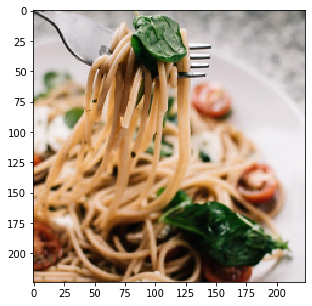

In [12]:
inference(model, 'imgs/03.jpg')

beacon: 77.87%
breakwater: 1.56%
bell_cote: 0.67%
mosque: 0.64%
water_tower: 0.58%


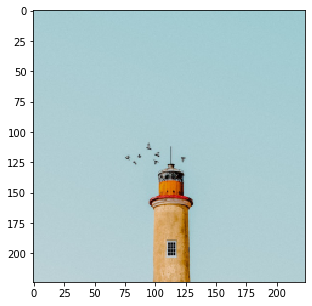

In [13]:
inference(model, 'imgs/04.jpg')

volcano: 13.97%
lakeside: 8.34%
park_bench: 6.38%
canoe: 5.46%
fountain: 4.76%


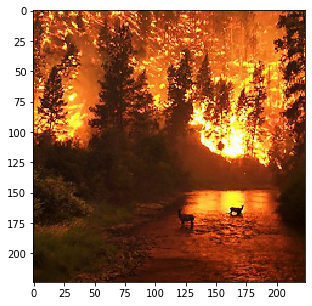

In [15]:
inference(model, 'imgs/1.jpg')

# EfficientNetB3

In [16]:
model3 = EfficientNetB3(weights='imagenet')

50126848/50122568 [==============================] - 4s 0us/step


palace: 80.16%
bell_cote: 3.59%
castle: 3.39%
church: 0.92%
vault: 0.65%


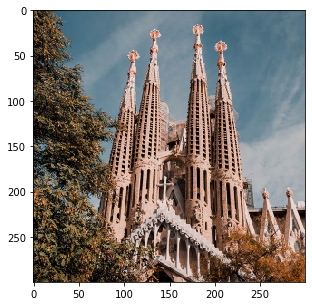

In [17]:
inference(model3, 'imgs/01.jpg')

gazelle: 65.10%
impala: 6.28%
water_buffalo: 3.37%
hartebeest: 1.44%
wallaby: 1.31%


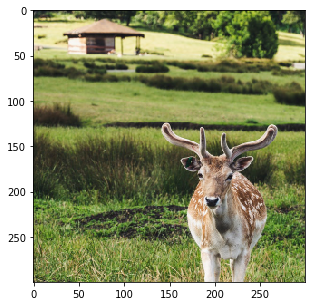

In [18]:
inference(model3, 'imgs/02.jpg')

carbonara: 82.69%
plate: 9.64%
restaurant: 0.32%
hot_pot: 0.16%
dining_table: 0.10%


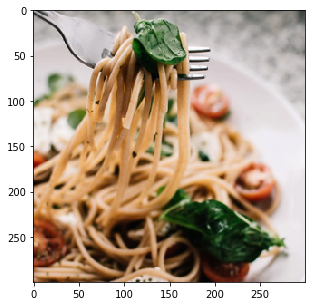

In [19]:
inference(model3, 'imgs/03.jpg')

beacon: 86.24%
breakwater: 0.99%
water_tower: 0.16%
bell_cote: 0.15%
lifeboat: 0.14%


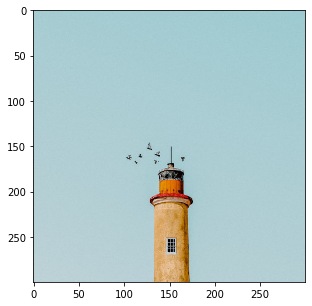

In [20]:
inference(model3, 'imgs/04.jpg')

breakwater: 76.14%
maze: 1.86%
lakeside: 0.83%
dock: 0.53%
fountain: 0.51%


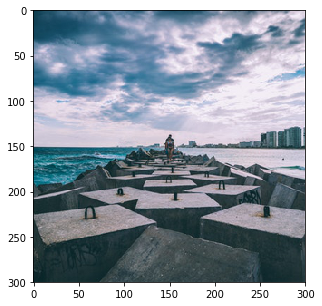

In [17]:
inference(model3, 'imgs/05.jpg')

lakeside: 84.83%
park_bench: 1.79%
boathouse: 1.41%
valley: 0.87%
canoe: 0.82%


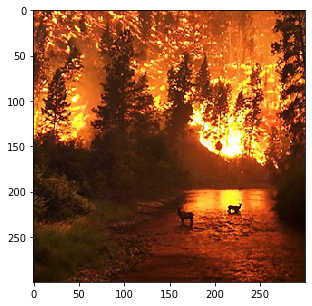

In [21]:
inference(model3, 'imgs/1.jpg')